In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("D:\\Python_Project\\amazon_prime_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [9]:
df.shape

(9668, 12)

In [5]:
df.drop(['show_id'],axis=1,inplace=True)
df.drop(['description'],axis=1,inplace=True)

In [7]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy"


In [17]:
# checking for duplicate

In [9]:
df.duplicated().sum()

0

In [17]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7585 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [11]:
df.isna().sum() #also df.isnull().sum()

type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
dtype: int64

In [25]:
#filling the null values
df['director'].fillna('Unvailable',inplace=True)
df['cast'].fillna('Unvailable',inplace=True)
df['country'].fillna('Unvailable',inplace=True)
df['date_added']=df['date_added'].ffill() # no need for inplace=true
df['rating']=df['rating'].fillna(df['rating'].mode()[0])






C:\Users\govin\AppData\Local\Temp\ipykernel_15480\3779845413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unvailable',inplace=True)
C:\Users\govin\AppData\Local\Temp\ipykernel_15480\3779845413.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [27]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [61]:
df['date_added'].unique()

<DatetimeArray>
['2021-03-30 00:00:00', '2021-04-01 00:00:00', '2021-04-04 00:00:00',
 '2021-04-10 00:00:00', '2021-04-17 00:00:00', '2021-04-24 00:00:00',
 '2021-05-02 00:00:00', '2021-06-03 00:00:00', '2021-04-13 00:00:00',
 '2021-04-20 00:00:00', '2021-04-26 00:00:00', '2021-04-27 00:00:00',
 '2021-04-30 00:00:00', '2021-05-01 00:00:00', '2021-05-09 00:00:00',
 '2021-05-11 00:00:00', '2021-05-12 00:00:00', '2021-05-13 00:00:00',
 '2021-05-18 00:00:00', '2021-05-19 00:00:00', '2021-05-22 00:00:00',
 '2021-05-24 00:00:00', '2021-05-29 00:00:00', '2021-06-04 00:00:00',
 '2021-06-11 00:00:00', '2021-06-12 00:00:00', '2021-06-15 00:00:00',
 '2021-06-18 00:00:00', '2021-06-20 00:00:00', '2021-06-21 00:00:00',
 '2021-06-22 00:00:00', '2021-06-23 00:00:00', '2021-06-24 00:00:00',
 '2021-06-25 00:00:00', '2021-06-26 00:00:00', '2021-06-29 00:00:00',
 '2021-07-01 00:00:00', '2021-07-03 00:00:00', '2021-07-08 00:00:00',
 '2021-07-12 00:00:00', '2021-07-16 00:00:00', '2021-07-17 00:00:00',
 '20

In [31]:
df['date_added']=pd.to_datetime(df['date_added'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   object        
 1   title         9668 non-null   object        
 2   director      9668 non-null   object        
 3   cast          9668 non-null   object        
 4   country       9668 non-null   object        
 5   date_added    9668 non-null   datetime64[ns]
 6   release_year  9668 non-null   int64         
 7   rating        9668 non-null   object        
 8   duration      9668 non-null   object        
 9   listed_in     9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


In [65]:
#top 10 directors with most directed movies
filtered_directors=df[df['director'] != 'Unvailable']
filtered_directors

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy"
...,...,...,...,...,...,...,...,...,...,...
9660,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",Unvailable,2021-10-10,2021,13+,96 min,Comedy
9662,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",Unvailable,2021-10-10,2021,16+,93 min,"Drama, Science Fiction, Suspense"
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",Unvailable,2021-10-10,1940,7+,60 min,Comedy
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",Unvailable,2021-10-10,2008,R,90 min,Action


In [67]:
top_directors=filtered_directors['director'].value_counts().head(10)
top_directors

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: count, dtype: int64

C:\Users\govin\AppData\Local\Temp\ipykernel_15480\4099836477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index,palette='plasma')


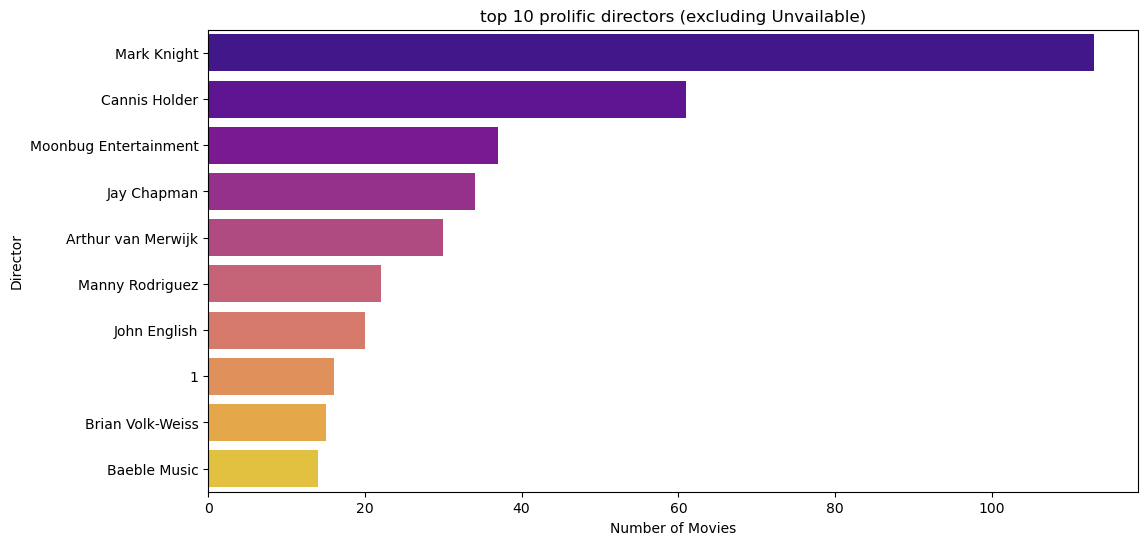

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values, y=top_directors.index,palette='plasma')
plt.title('top 10 prolific directors (excluding Unvailable)')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [45]:
filtered_actors=df[df['cast'] != 'Unvailable']
top_actors=filtered_actors['cast'].value_counts().head(10)

C:\Users\govin\AppData\Local\Temp\ipykernel_15480\724089424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index,palette='plasma')


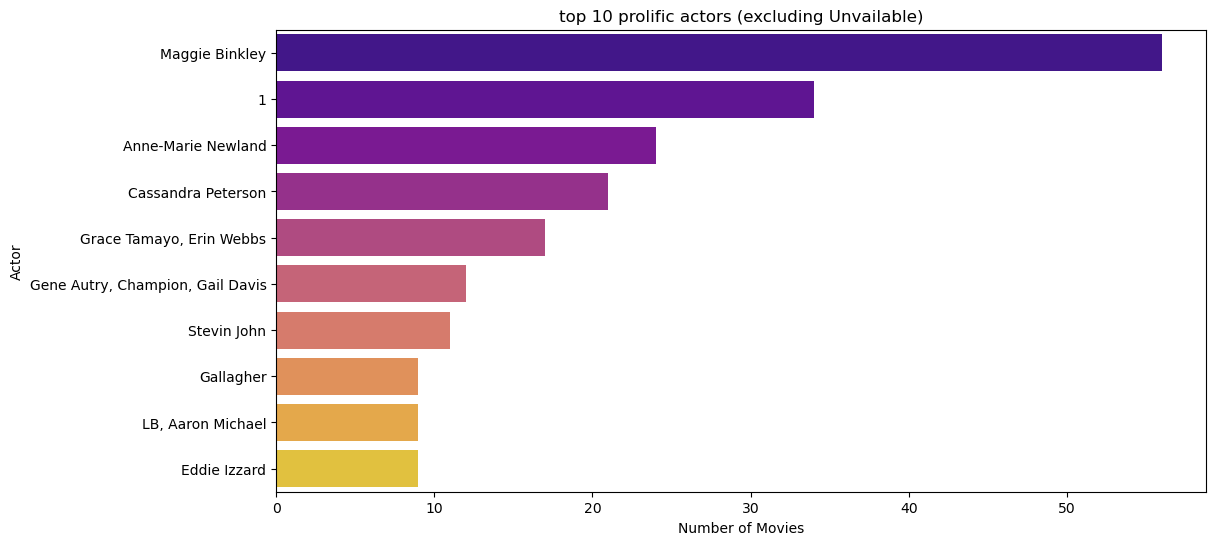

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_actors.values, y=top_actors.index,palette='plasma')
plt.title('top 10 prolific actors (excluding Unvailable)')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

In [49]:
df['type'].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

C:\Users\govin\AppData\Local\Temp\ipykernel_15480\2542627482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='viridis')


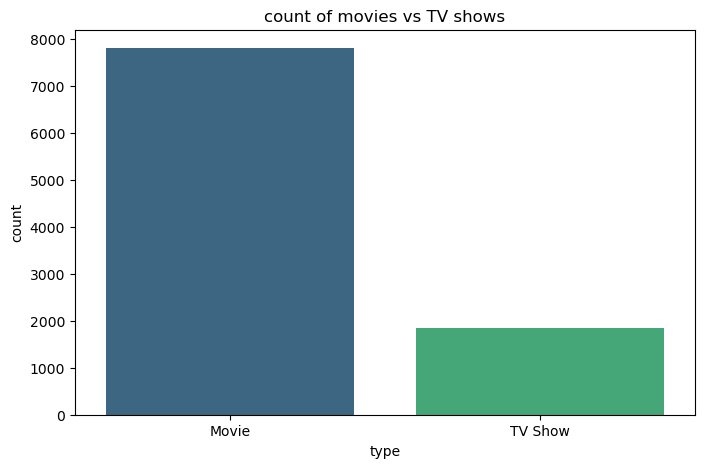

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df,x='type',palette='viridis')
plt.title('count of movies vs TV shows')
plt.show()

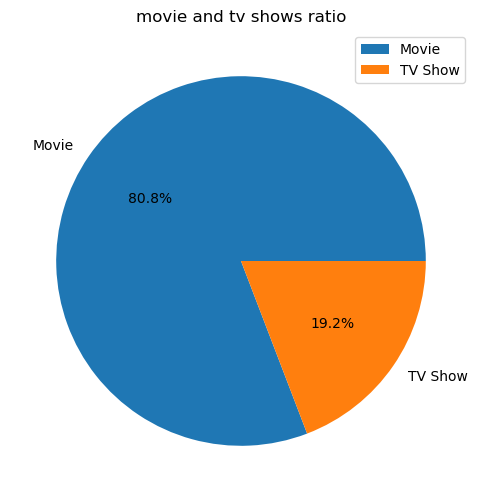

In [75]:
df_pie=df['type'].copy().value_counts()
plt.figure(figsize=(6,6))
plt.pie(x=df_pie.values,labels=df_pie.index,autopct='%1.1f%%')
plt.title('movie and tv shows ratio')
plt.legend()
plt.show()

In [77]:
df['rating'].unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [55]:
df.groupby('type')['rating'].value_counts()

type     rating  
Movie    13+         2180
         16+         1272
         18+         1097
         R           1010
         ALL          988
         PG-13        393
         7+           288
         PG           253
         NR           194
         G             93
         UNRATED       33
         AGES_18_       3
         NC-17          3
         NOT_RATE       3
         AGES_16_       2
         16             1
         ALL_AGES       1
TV Show  ALL          280
         16+          275
         13+          274
         TV-14        208
         TV-PG        169
         18+          146
         TV-NR        105
         7+            97
         TV-G          81
         TV-MA         77
         TV-Y          74
         TV-Y7         39
         NR            29
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

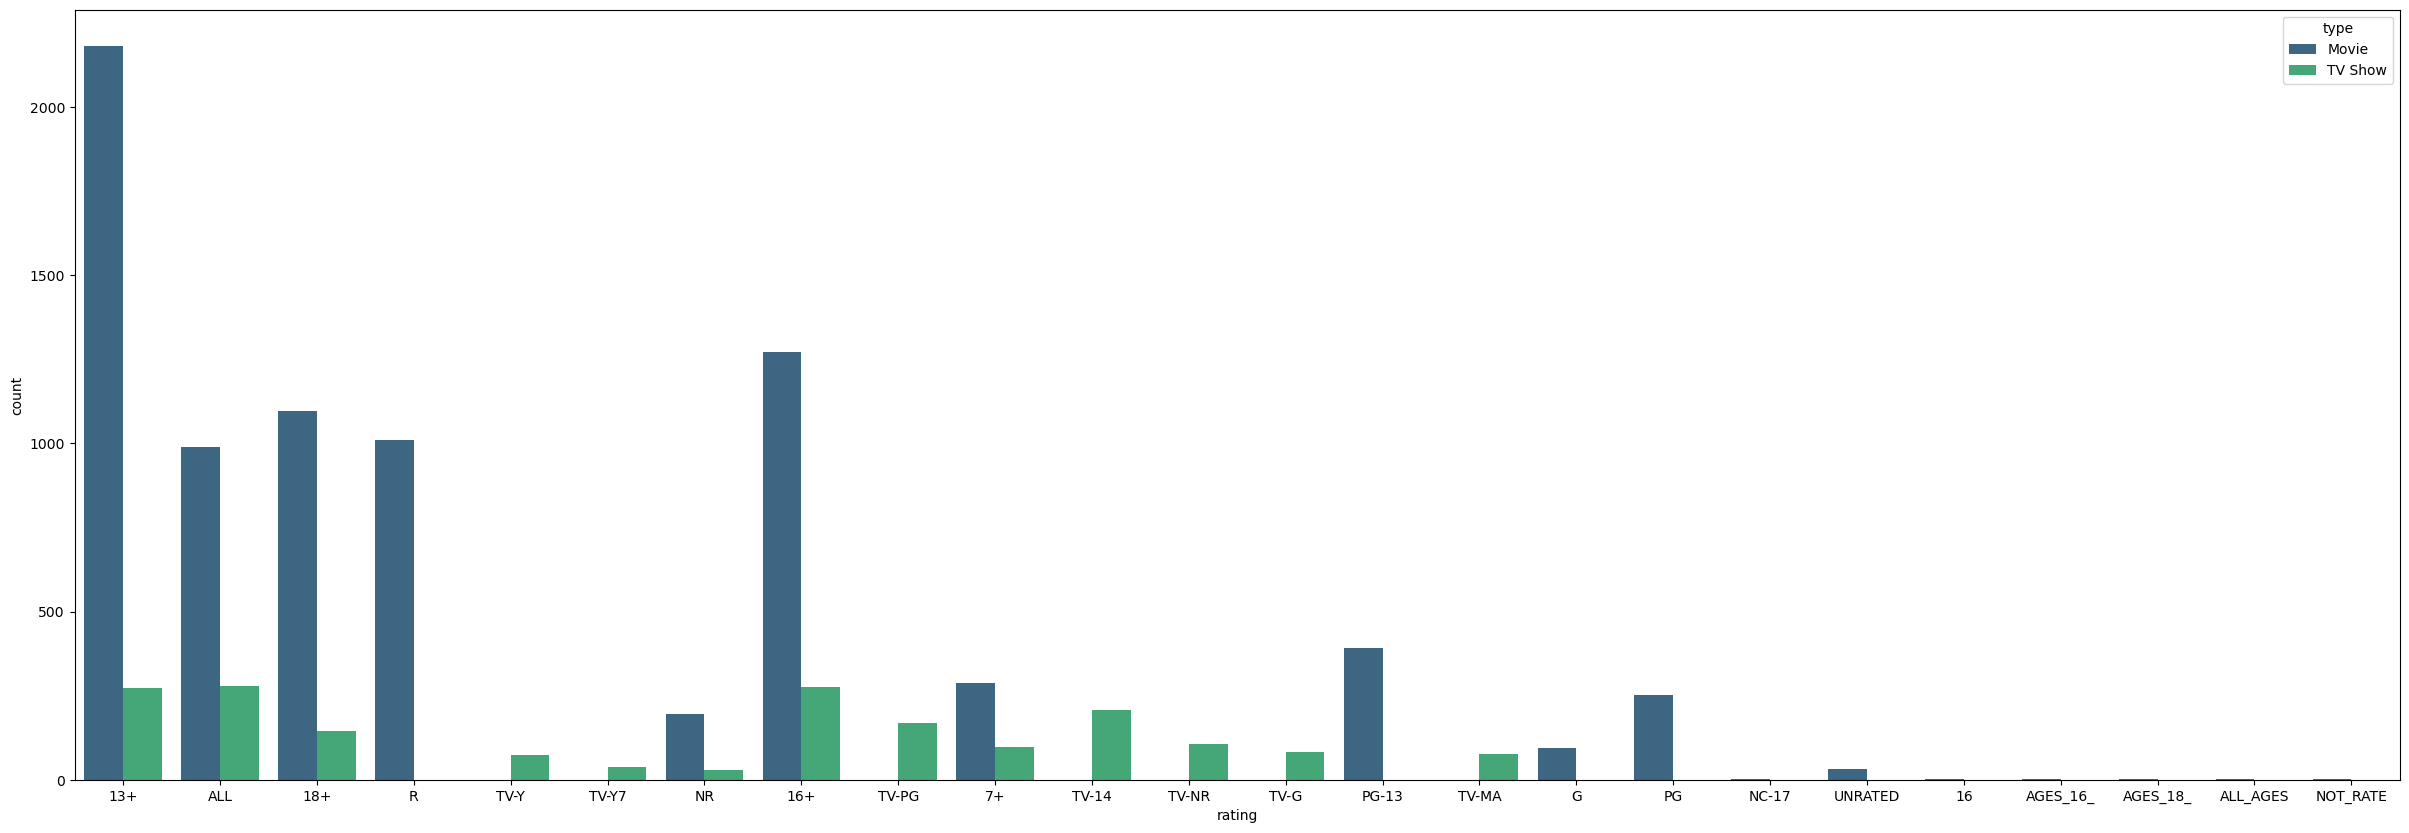

In [79]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['rating'],data=df,hue='type',palette='viridis')

In [81]:
filtered_country=df[df['country']!='Unvailable']
country_counts=filtered_country['country'].value_counts()

In [69]:
country_counts

country
United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                               1
Australia, United States, Germany          1
Germany, Austria, United States            1
Italy, Spain                               1
Name: count, Length: 86, dtype: int64

In [83]:
top_countries=country_counts.nlargest(3).index
top_countries

Index(['United States', 'India', 'United Kingdom'], dtype='object', name='country')

In [85]:
df_top_countries=filtered_country[filtered_country['country'].isin(top_countries)]
df_top_countries

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy"
5,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,2021-03-30,1989,13+,52 min,"Fantasy, Kids"
...,...,...,...,...,...,...,...,...,...,...
9604,Movie,Bride Wars,Gary Winick,"Kate Hudson, Anne Hathaway, Kristen Johnston, ...",United States,2021-10-08,2009,PG,89 min,Comedy
9614,Movie,What Happens in Vegas,Tom Vaughan,"Cameron Diaz, Ashton Kutcher, Rob Corddry, ...",United States,2021-10-08,2008,PG-13,99 min,Comedy
9641,Movie,Marley & Me,David Frankel,"Owen Wilson, Jennifer Aniston",United States,2021-10-10,2008,PG,116 min,"Comedy, Drama, Kids"
9643,Movie,Love & Other Drugs,Edward Zwick,"K K, Jake Gyllenhaal, Anne Hathaway, Oliver Pl...",United States,2021-10-10,2010,R,112 min,"Comedy, Drama"


C:\Users\govin\AppData\Local\Temp\ipykernel_4420\1404802521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_countries,x='country',palette='viridis')


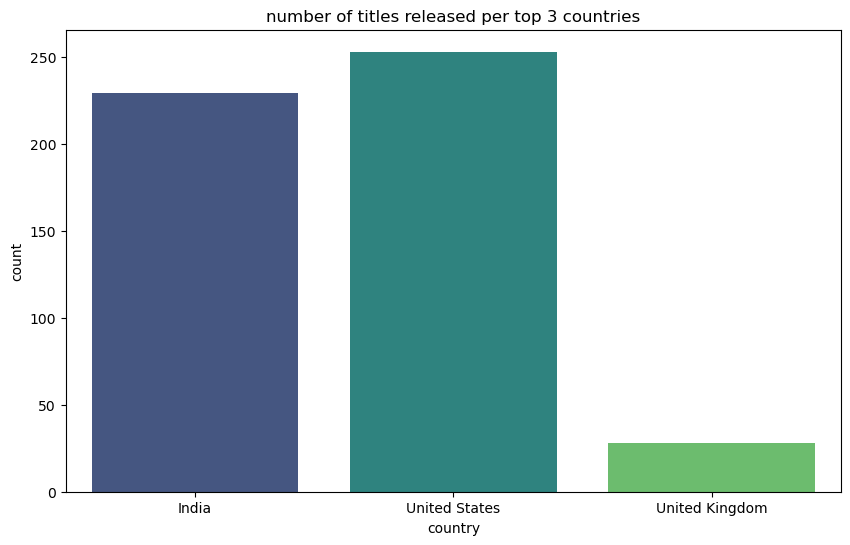

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_countries,x='country',palette='viridis')
plt.title('number of titles released per top 3 countries')
plt.show()

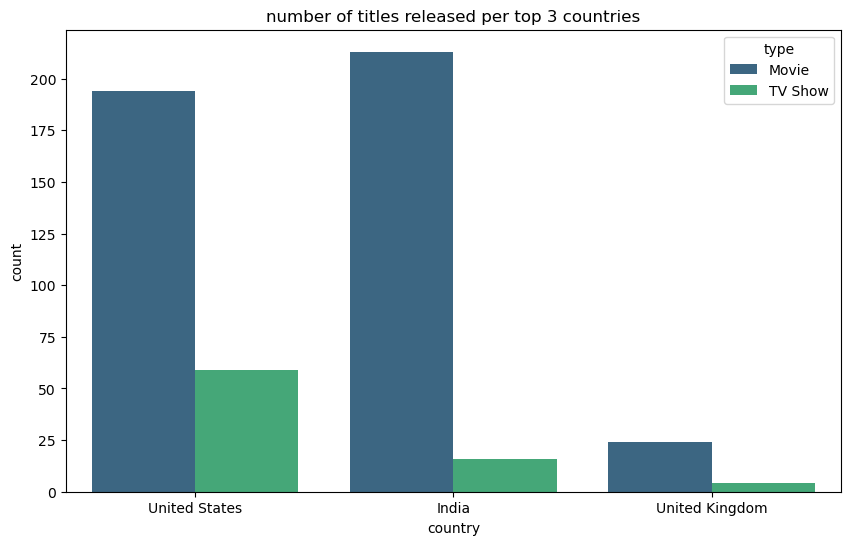

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_countries,x='country',palette='viridis',hue='type',order=top_countries)
plt.title('number of titles released per top 3 countries')
plt.show()

In [91]:
year_counts=df['release_year'].value_counts()
top_years=year_counts.nlargest(10).index
df_top_years=df[df['release_year'].isin(top_years)]


C:\Users\govin\AppData\Local\Temp\ipykernel_15480\896697362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_years,x='release_year',palette='viridis',order=top_years)


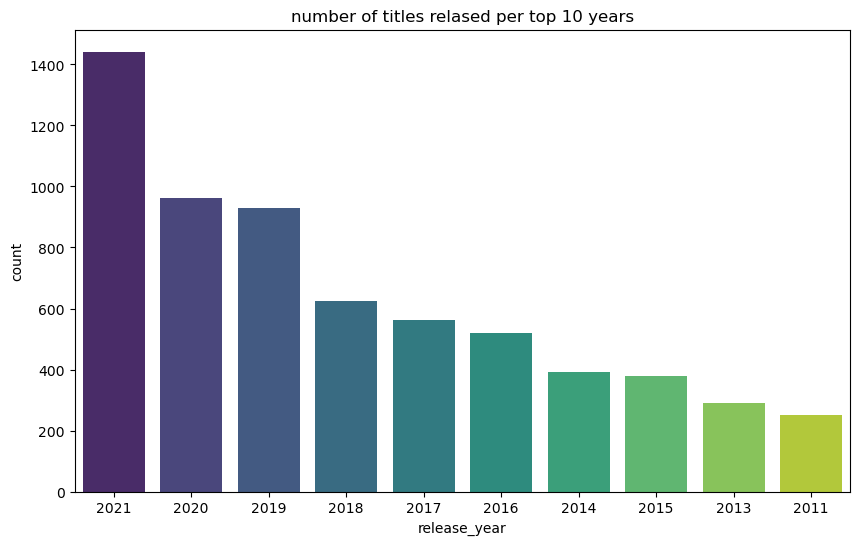

In [103]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x='release_year',palette='viridis',order=top_years)
plt.title('number of titles relased per top 10 years')
plt.show()

C:\Users\govin\AppData\Local\Temp\ipykernel_15480\1154925410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_years,x='release_year',palette='viridis')


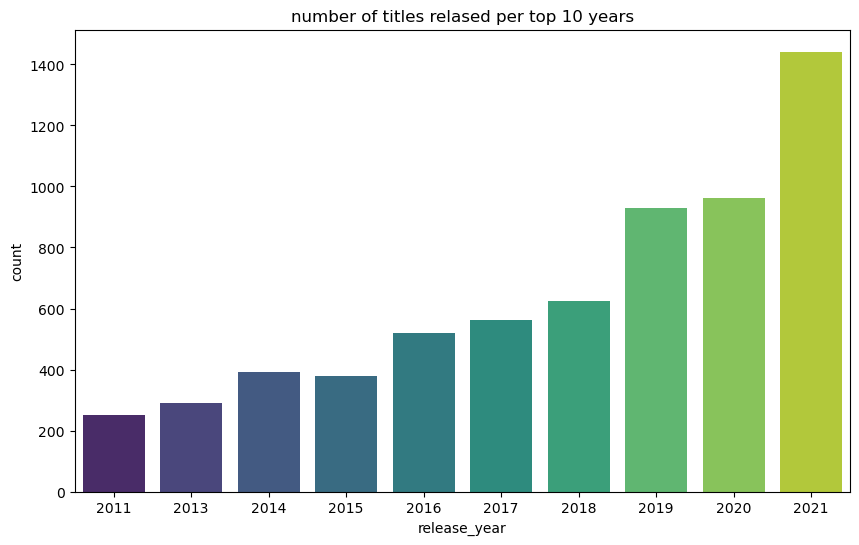

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x='release_year',palette='viridis')
plt.title('number of titles relased per top 10 years')
plt.show()

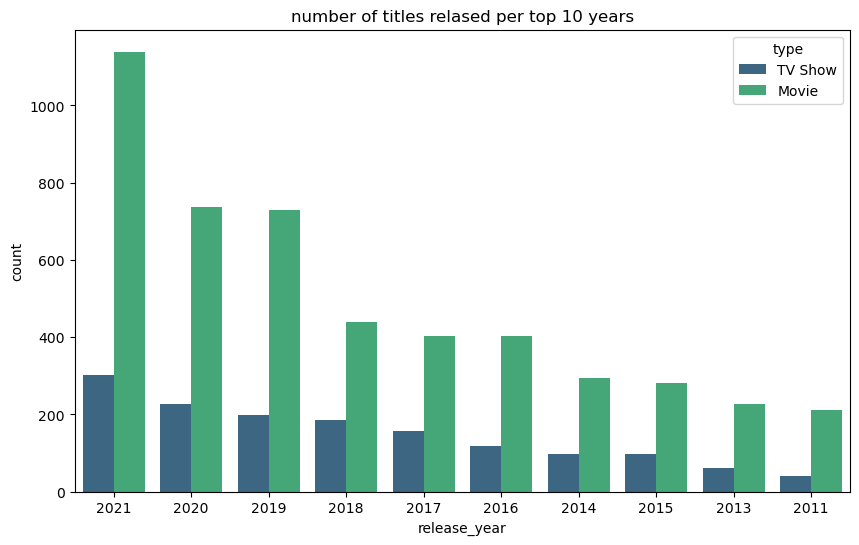

In [105]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x='release_year',hue='type',palette='viridis',order=top_years)
plt.title('number of titles relased per top 10 years')
plt.show()

In [117]:
df['Generes']=df['listed_in'].apply(lambda x:x.split(', '))

In [125]:
df['Generes']

0                 [Comedy, Drama]
1          [Drama, International]
2       [Action, Drama, Suspense]
3                   [Documentary]
4                [Drama, Fantasy]
                  ...            
9663                     [Comedy]
9664                   [TV Shows]
9665                     [Action]
9666              [Drama, Sports]
9667    [Action, Drama, Suspense]
Name: Generes, Length: 9668, dtype: object

In [119]:
generes_exploded=df.explode('Generes')

C:\Users\govin\AppData\Local\Temp\ipykernel_15480\3506226401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=generes_exploded,y='Generes',order=generes_exploded['Generes'].value_counts().index,palette='viridis')


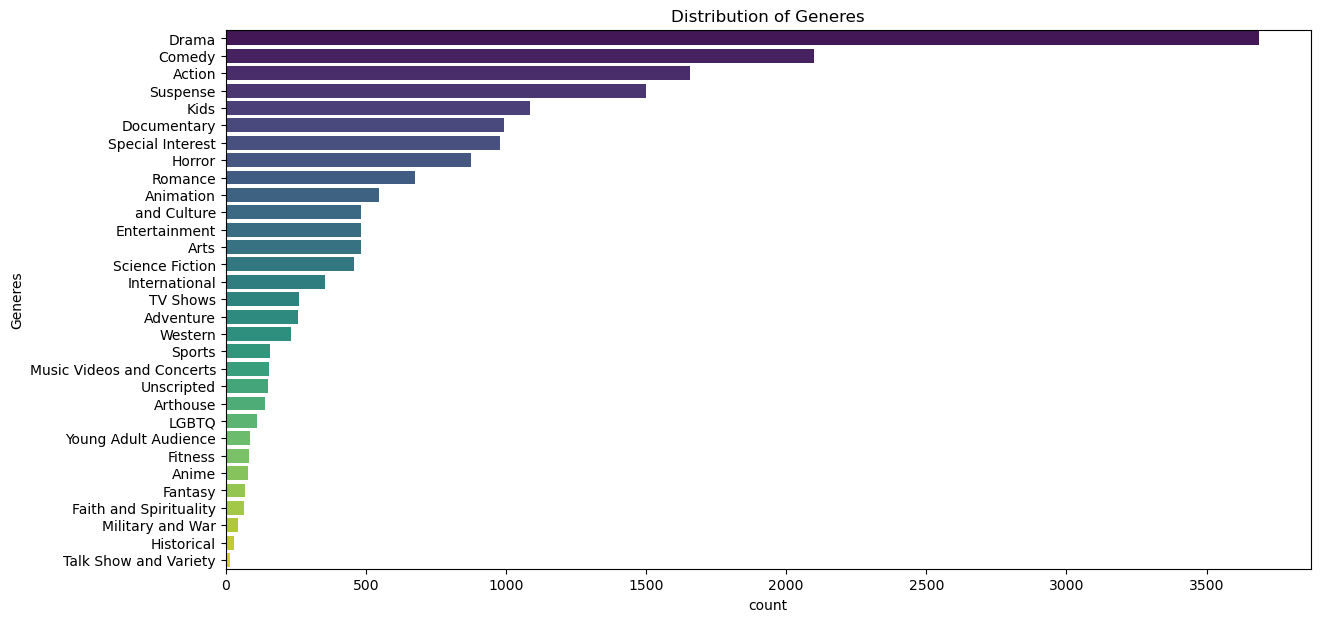

In [121]:
plt.figure(figsize=(14,7))
sns.countplot(data=generes_exploded,y='Generes',order=generes_exploded['Generes'].value_counts().index,palette='viridis')
plt.title('Distribution of Generes')
plt.show()

In [127]:
df['duration'].unique()

array(['113 min', '110 min', '74 min', '69 min', '45 min', '52 min',
       '98 min', '131 min', '87 min', '92 min', '88 min', '93 min',
       '94 min', '46 min', '96 min', '1 Season', '104 min', '62 min',
       '50 min', '3 Seasons', '2 Seasons', '86 min', '36 min', '37 min',
       '103 min', '9 min', '18 min', '14 min', '20 min', '19 min',
       '22 min', '60 min', '6 min', '54 min', '5 min', '84 min',
       '126 min', '125 min', '109 min', '89 min', '85 min', '56 min',
       '40 min', '111 min', '33 min', '34 min', '95 min', '99 min',
       '78 min', '4 Seasons', '77 min', '55 min', '53 min', '115 min',
       '58 min', '49 min', '135 min', '91 min', '64 min', '59 min',
       '48 min', '122 min', '90 min', '102 min', '65 min', '114 min',
       '136 min', '70 min', '138 min', '100 min', '480 min', '4 min',
       '30 min', '152 min', '68 min', '57 min', '7 Seasons', '31 min',
       '151 min', '149 min', '9 Seasons', '141 min', '121 min', '79 min',
       '140 min', '51 min'

In [129]:
df_movies=df[df['type']=='Movie'].copy()
df_tv_shows=df[df['type']=='TV Show'].copy()
df_movies['duration_num']=df_movies['duration'].str.extract('(\d+)',expand=False).astype(float)
df_tv_shows['duration_num']=df_tv_shows['duration'].str.extract('(\d+)',expand=False).astype(float)


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\govin\AppData\Local\Temp\ipykernel_15480\2365630129.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration_num']=df_movies['duration'].str.extract('(\d+)',expand=False).astype(float)
C:\Users\govin\AppData\Local\Temp\ipykernel_15480\2365630129.py:4: SyntaxWarning: invalid escape sequence '\d'
  df_tv_shows['duration_num']=df_tv_shows['duration'].str.extract('(\d+)',expand=False).astype(float)


In [131]:
df_movies

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Generes,duration_num
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama","[Comedy, Drama]",113.0
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International","[Drama, International]",110.0
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense","[Action, Drama, Suspense]",74.0
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary,[Documentary],69.0
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy","[Drama, Fantasy]",45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9660,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",Unvailable,2021-10-10,2021,13+,96 min,Comedy,[Comedy],96.0
9662,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",Unvailable,2021-10-10,2021,16+,93 min,"Drama, Science Fiction, Suspense","[Drama, Science Fiction, Suspense]",93.0
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",Unvailable,2021-10-10,1940,7+,60 min,Comedy,[Comedy],60.0
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",Unvailable,2021-10-10,2008,R,90 min,Action,[Action],90.0


In [133]:
df_tv_shows

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Generes,duration_num
17,TV Show,Zoo Babies,Unvailable,Narrator - Gillian Barlett,Unvailable,2021-06-03,2008,ALL,1 Season,"Kids, Special Interest","[Kids, Special Interest]",1.0
18,TV Show,Zoë Coombs Marr: Bossy Bottom,Unvailable,Zoë Coombs Marr,Unvailable,2021-06-03,2020,18+,1 Season,"Comedy, Talk Show and Variety","[Comedy, Talk Show and Variety]",1.0
20,TV Show,Zoboomafoo,Unvailable,Unvailable,Unvailable,2021-06-03,2001,TV-Y,1 Season,Kids,[Kids],1.0
21,TV Show,Zo Zo Zombie: Mini-Series,Unvailable,"Alex Cazares, Ben Diskin, Cristina Vee, Erika ...",Unvailable,2021-06-03,2020,TV-Y7,1 Season,"Action, Anime, Comedy","[Action, Anime, Comedy]",1.0
23,TV Show,ZeroZeroZero,Unvailable,"ANDREA RISEBOROUGH, HAROLD TORRES, CLAUDIA PIN...",Italy,2021-06-03,2020,18+,1 Season,TV Shows,[TV Shows],1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9651,TV Show,Glass Room,Unvailable,"Elizaveta Maiskaya, Vsevolod Boldin, Alexander...",Unvailable,2021-10-10,2019,16+,1 Season,Drama,[Drama],1.0
9655,TV Show,DaFUNdamentals Series,Unvailable,"Emile Crawford, Randall Crawford, Jon Ward",Unvailable,2021-10-10,2021,TV-Y,1 Season,"Animation, Kids","[Animation, Kids]",1.0
9661,TV Show,Terrahawks,Unvailable,"DENISE BRYER, WINDSOR DAVIES, JEREMY HITCHEN, ...",Unvailable,2021-10-10,1983,ALL,3 Seasons,TV Shows,[TV Shows],3.0
9664,TV Show,Planet Patrol,Unvailable,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",Unvailable,2021-10-10,2018,13+,4 Seasons,TV Shows,[TV Shows],4.0


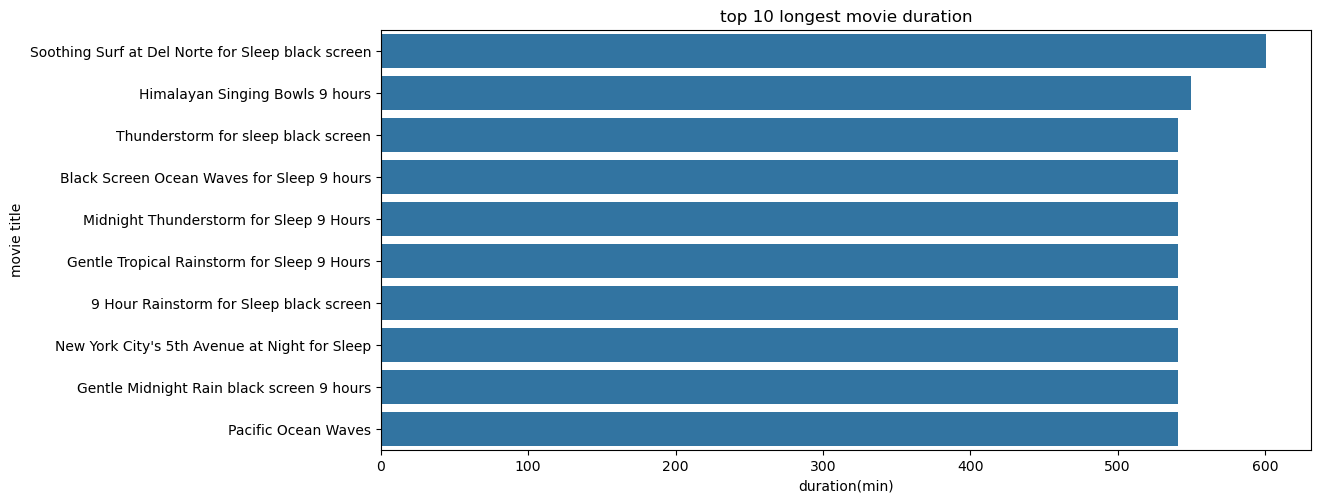

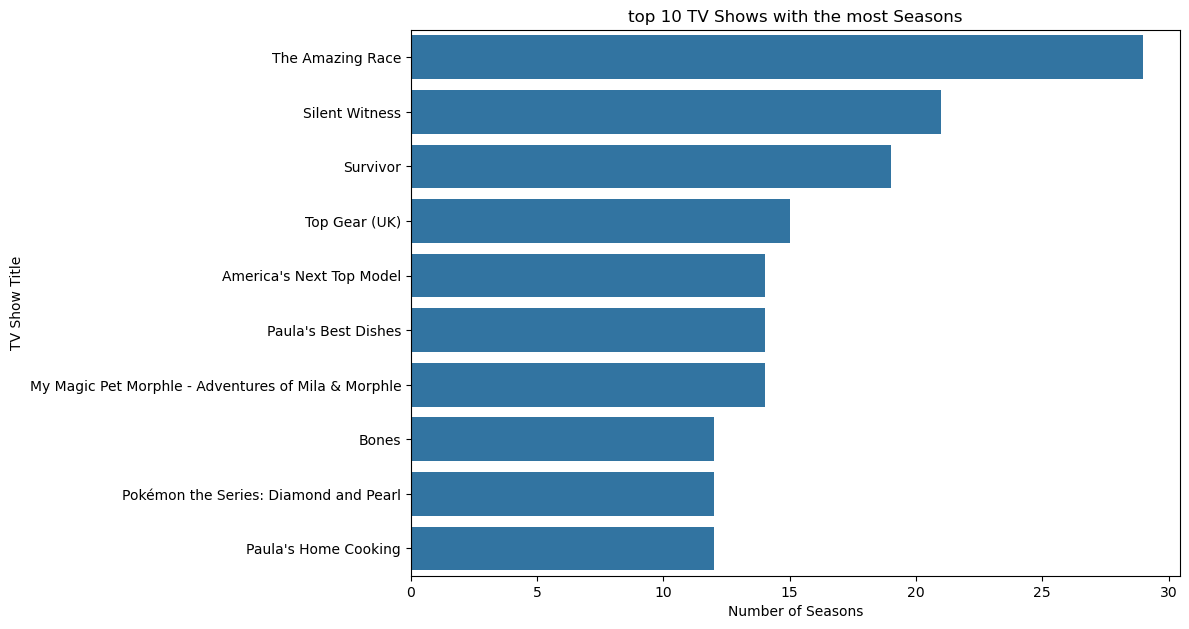

In [145]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.barplot(data=df_movies.sort_values(by='duration_num',ascending=False).head(10),
            y='title',x='duration_num',orient='horizontal')
plt.title('top 10 longest movie duration')
plt.xlabel('duration(min)')
plt.ylabel('movie title')
plt.figure(figsize=(12,12))
plt.subplot(2,1,2)
sns.barplot(data=df_tv_shows.sort_values(by='duration_num',ascending=False).head(10),
            y='title',x='duration_num',orient='horizontal')
plt.title('top 10 TV Shows with the most Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('TV Show Title')

plt.tight_layout()
plt.show()

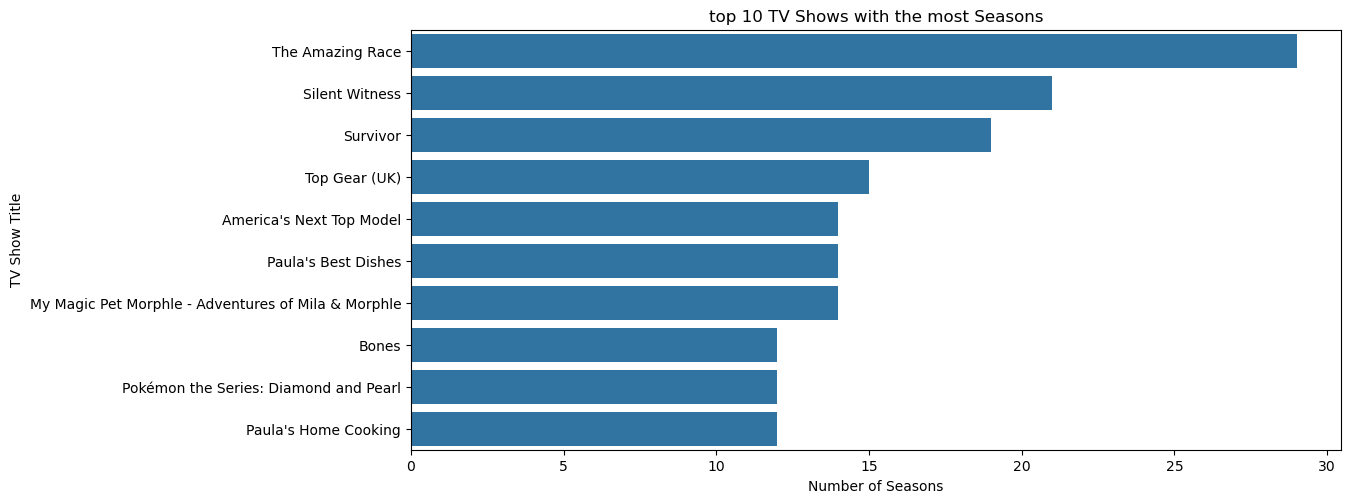

In [139]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.barplot(data=df_tv_shows.sort_values(by='duration_num',ascending=False).head(10),y='title',x='duration_num',orient='horizontal')
plt.title('top 10 TV Shows with the most Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('TV Show Title')
plt.show()

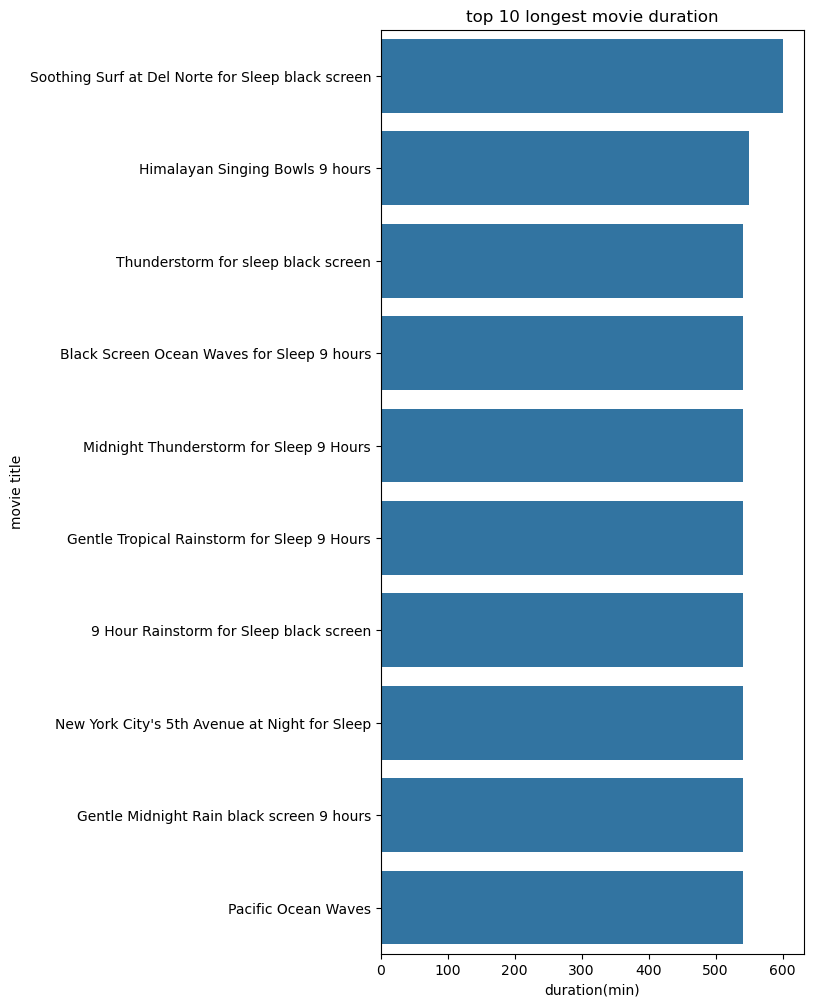

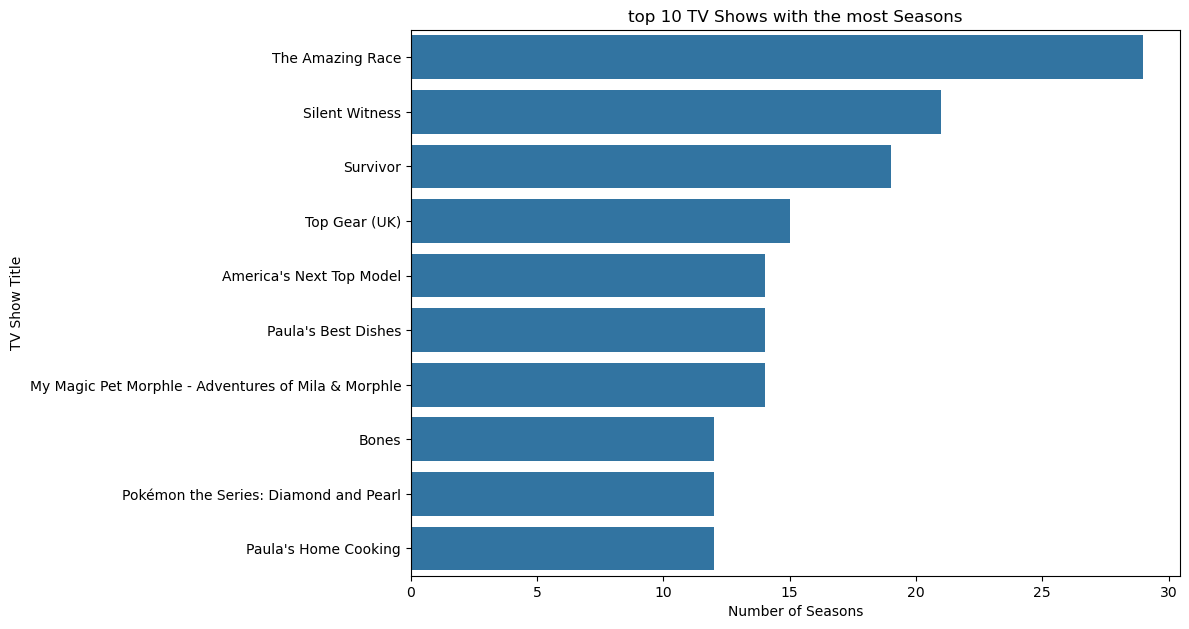

In [143]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,2)
sns.barplot(data=df_movies.sort_values(by='duration_num',ascending=False).head(10),y='title',x='duration_num',orient='horizontal')
plt.title('top 10 longest movie duration')
plt.xlabel('duration(min)')
plt.ylabel('movie title')
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.barplot(data=df_tv_shows.sort_values(by='duration_num',ascending=False).head(10),y='title',x='duration_num',orient='horizontal')
plt.title('top 10 TV Shows with the most Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('TV Show Title')

plt.tight_layout()
plt.show()